<a href="https://colab.research.google.com/github/coder7475/Banglsdeshi_banana_ripeness_classification/blob/main/BICUTLUD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Project for thesis by Robiul Hossain, 1304009, CUET
# Project Name: 
# Bangladeshi Banana Ripeness Classification using Transfer Learning Using DenseNet
# Steps in project: 
# 1) Data Collection    2) Data Preprocessing 
# 3) Model Selection    4) Model Training     
# 5) Model Evaluation   6) Deployment

In [9]:
# Cell for importing libraries
import os
import shutil
import torch
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, random_split, DataLoader
import torch.nn as nn
from PIL import Image
import torchvision.models as models
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from torchvision import datasets
import torchvision.transforms as T
from sklearn.metrics import f1_score
import torch.nn.functional as F
import torch.nn as nn
from torchvision.utils import make_grid
from google.colab import drive
import cv2
from torchsummary import summary
import torch.optim as optim

**Step 1**
Data Collection

In [10]:
# Step 1: Data Collection
# Train images are mainly collected manually using camera of an android phone
# Test images are collected from internet
# Mount the google drive where dataset is stored
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Prepare the data : create directory variable to access images
data_dir = '/content/drive/MyDrive/Banana' 
os.listdir(data_dir)

['train', 'test']

In [14]:
# Train dataset classes
train_dir = data_dir + '/train'
train_classes = os.listdir(train_dir)
train_classes

['overripe', 'unripe', 'ripe']

In [136]:
# Test dataset classes
test_dir = data_dir + '/test'
test_classes = os.listdir(test_dir)
test_classes

['overripe', 'unripe', 'ripe']

In [16]:
# See number of images available for each classes in train and test set
tr_overripe = os.listdir(train_dir + '/overripe')
te_overripe = os.listdir(test_dir + '/overripe')
tr_ripe = os.listdir(train_dir + '/ripe')
te_ripe = os.listdir(test_dir + '/ripe')
tr_unripe = os.listdir(train_dir + '/unripe')
te_unripe = os.listdir(test_dir + '/unripe')
print("Train Set:")
print("overripe: ", len(tr_overripe), "unripe: ", len(tr_unripe), "ripe: ", len(tr_ripe))
print("Test Set")
print("overripe: ", len(te_overripe), "ripe: ", len(te_ripe), "unripe: ", len(te_unripe))

Train Set:
overripe:  46 unripe:  63 ripe:  65
Test Set
overripe:  12 ripe:  27 unripe:  24


In [17]:
tr_unripe[:5]

['images (11).jpeg',
 'bananas-5241527__480.jpg',
 'bananas-4807124__340.jpg',
 'image (31).jpeg',
 'bananas-4807124__480.jpg']

**Step 2**
Data Preprocessing

In [18]:
# Rename all the images uniformly train ripe folder
prefix = 'img'
for i, image_name in enumerate(tr_ripe):
    image_path = os.path.join(train_dir + '/ripe', image_name)
    new_image_name = prefix + str(i) + '.' + image_name.split('.')[-1]
    new_image_path = os.path.join(train_dir + '/ripe', new_image_name)
    shutil.move(image_path, new_image_path)

In [19]:
# Rename all the images uniformly test ripe folder
prefix = 'img'
for i, image_name in enumerate(te_ripe):
    image_path = os.path.join(test_dir + '/ripe', image_name)
    new_image_name = prefix + str(i) + '.' + image_name.split('.')[-1]
    new_image_path = os.path.join(test_dir + '/ripe', new_image_name)
    shutil.move(image_path, new_image_path)

In [20]:
# Rename all the images uniformly train overripe
prefix = 'img'
for i, image_name in enumerate(tr_overripe):
    image_path = os.path.join(train_dir + '/overripe', image_name)
    new_image_name = prefix + str(i) + '.' + image_name.split('.')[-1]
    new_image_path = os.path.join(train_dir + '/overripe', new_image_name)
    shutil.move(image_path, new_image_path)

In [21]:
# Rename all the images uniformly test overripe
prefix = 'img'
for i, image_name in enumerate(te_overripe):
    image_path = os.path.join(test_dir + '/overripe', image_name)
    new_image_name = prefix + str(i) + '.' + image_name.split('.')[-1]
    new_image_path = os.path.join(test_dir + '/overripe', new_image_name)
    shutil.move(image_path, new_image_path)

In [22]:
# Rename all the images uniformly in train unripe
prefix = 'img'
for i, image_name in enumerate(tr_unripe):
    image_path = os.path.join(train_dir + '/unripe', image_name)
    new_image_name = prefix + str(i) + '.' + image_name.split('.')[-1]
    new_image_path = os.path.join(train_dir + '/unripe', new_image_name)
    shutil.move(image_path, new_image_path)

In [23]:
# Rename all the images uniformly in test unripe
prefix = 'img'
for i, image_name in enumerate(te_unripe):
    image_path = os.path.join(test_dir + '/unripe', image_name)
    new_image_name = prefix + str(i) + '.' + image_name.split('.')[-1]
    new_image_path = os.path.join(test_dir + '/unripe', new_image_name)
    shutil.move(image_path, new_image_path)

In [24]:
# Check if renaming is successfull
tr_overripe = os.listdir(train_dir + '/overripe')
te_overripe = os.listdir(test_dir + '/overripe')
tr_ripe = os.listdir(train_dir + '/ripe')
te_ripe = os.listdir(test_dir + '/ripe')
tr_unripe = os.listdir(train_dir + '/unripe')
te_unripe = os.listdir(test_dir + '/unripe')
print(tr_overripe[:6])
print(te_overripe[:6])
print(tr_ripe[:6])
print(te_ripe[:6])
print(tr_unripe[:6])
print(te_unripe[:6])

['img0.jpeg', 'img1.jpg', 'img2.jpeg', 'img3.jpg', 'img4.jpg', 'img5.jpg']
['img0.jpg', 'img1.jpg', 'img2.jpeg', 'img3.jpeg', 'img4.jpeg', 'img5.jpg']
['img0.jpg', 'img1.jpg', 'img2.jpg', 'img3.jpg', 'img4.jpeg', 'img5.jpg']
['img0.jpg', 'img1.jpg', 'img2.jpg', 'img3.jpg', 'img4.jpg', 'img5.jpg']
['img0.jpeg', 'img1.jpg', 'img2.jpg', 'img3.jpeg', 'img4.jpg', 'img5.jpg']
['img0.jpg', 'img1.jpg', 'img2.jpg', 'img3.jpg', 'img4.jpg', 'img5.jpg']


In [25]:
# Define a transform to convert the images to PyTorch tensors: use transforms as T
data_transform = T.Compose([
    T.ToTensor()
])
# Load using PyTorch datasets function: ImageFolder
train_set = datasets.ImageFolder(train_dir, transform=data_transform)

# Explore the data:
# img_path = train_set.imgs[2][0]
#train_set[0][0].shape
train_classes

['overripe', 'unripe', 'ripe']

In [26]:
# check some shapes of images
count = 5
for images, labels in train_set:
    print(images.shape)
    count -= 1
    if count == 0:
        break

torch.Size([3, 338, 500])
torch.Size([3, 1500, 1200])
torch.Size([3, 3096, 4128])
torch.Size([3, 3096, 4128])
torch.Size([3, 3096, 4128])


In [81]:
# Resize the images to 224 x 224 for DenseNet
# Used cv2 for permenant resize
# Define the directory containing the image
#dir_path = train_dir + '/overripe'
#dir_path = train_dir + '/ripe'
#dir_path = train_dir + '/unripe'

# Define the target size for the resized images
#target_size = (224, 224)

# Loop through each file in the directory
#for filename in os.listdir(dir_path):
    # Load the image using cv2
 #   img = cv2.imread(os.path.join(dir_path, filename))
    # Resize the image
  #  resized_img = cv2.resize(img, target_size)
    # Save the resized image with the same filename
   # cv2.imwrite(os.path.join(dir_path, filename), resized_img)

In [28]:
print("overripe: ", len(tr_overripe), "unripe: ", len(tr_unripe), "ripe: ", len(tr_ripe))

overripe:  46 unripe:  63 ripe:  65


In [29]:
train_classes

['overripe', 'unripe', 'ripe']

In [82]:
# Now resizing and transforming to tensor is done:
# Check
img, label = train_set[6]
print(img.shape, label)
img
#img.dtype

torch.Size([3, 224, 224]) 0


tensor([[[0.3529, 0.3294, 0.3647,  ..., 0.2941, 0.2627, 0.3020],
         [0.3412, 0.3529, 0.3686,  ..., 0.2824, 0.3059, 0.3098],
         [0.3255, 0.3451, 0.3412,  ..., 0.2941, 0.2980, 0.3255],
         ...,
         [0.4196, 0.3804, 0.4078,  ..., 0.3529, 0.3647, 0.3725],
         [0.4314, 0.4471, 0.4000,  ..., 0.3922, 0.3333, 0.3294],
         [0.4824, 0.4314, 0.4314,  ..., 0.3569, 0.3373, 0.3647]],

        [[0.3176, 0.3020, 0.3373,  ..., 0.2941, 0.2627, 0.3020],
         [0.3059, 0.3255, 0.3412,  ..., 0.2824, 0.3059, 0.3098],
         [0.2902, 0.3176, 0.3137,  ..., 0.2941, 0.2980, 0.3255],
         ...,
         [0.4078, 0.3686, 0.3961,  ..., 0.3451, 0.3569, 0.3647],
         [0.4196, 0.4353, 0.3882,  ..., 0.3843, 0.3255, 0.3216],
         [0.4706, 0.4196, 0.4196,  ..., 0.3490, 0.3294, 0.3569]],

        [[0.2824, 0.2627, 0.2980,  ..., 0.2627, 0.2314, 0.2706],
         [0.2706, 0.2863, 0.3020,  ..., 0.2510, 0.2745, 0.2784],
         [0.2549, 0.2784, 0.2745,  ..., 0.2627, 0.2667, 0.

Here 0 = overripe, 1 = ripe, 2 = unripe

In [31]:
# is data type correct: torch float 32 bit
img.dtype

torch.float32

In [32]:
label

0

Let's see some examples

In [33]:
# Function for showing example
def show_example(img, label):
    print('Label: ', train_set.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  ripe (1)


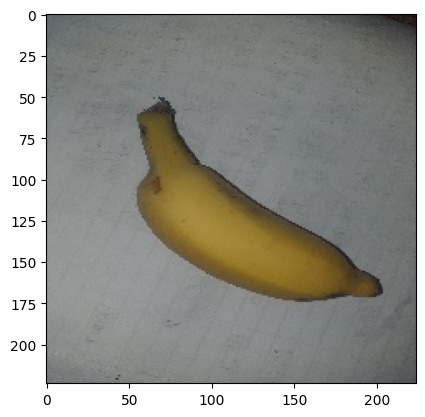

In [83]:
show_example(*train_set[83])

Label:  overripe (0)


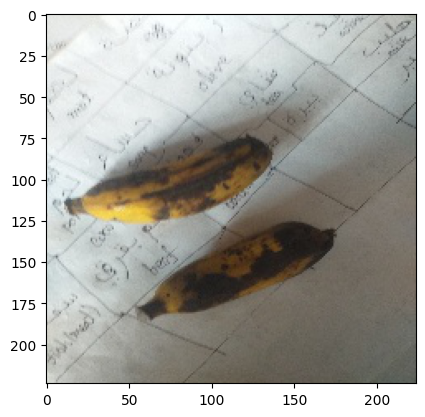

In [84]:
show_example(*train_set[2])

Label:  unripe (2)


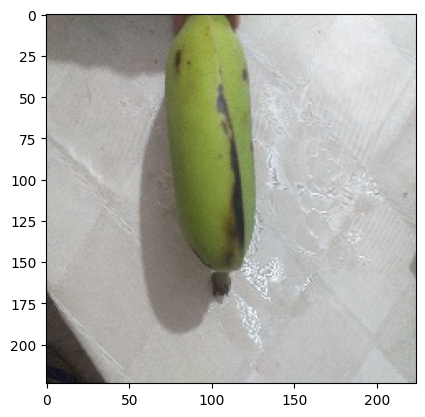

In [85]:
show_example(*train_set[138])

**Split the train dataset into train and validation set**

My test dataset is reserved for evaluation(testing). so we will split the train dataset. Here I use random_split helper method from PyTorch

In [86]:
len(train_set)

174

Take 36 images for validation and rest for training

In [74]:
# use random seed to make sure to create same validation set each time.
random_seed = 32
torch.manual_seed(random_seed)

In [87]:
val_size = 36
train_size = len(train_set) - val_size
# Split using random_split func
train_ds, val_ds = random_split(train_set, [train_size, val_size])
len(train_ds), len(val_ds)

(138, 36)

**Load Data in batches**

Use DataLoader from PyTorch.

In [88]:
batch_size = 6
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size)

In [89]:
# Look at a batch of sample
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

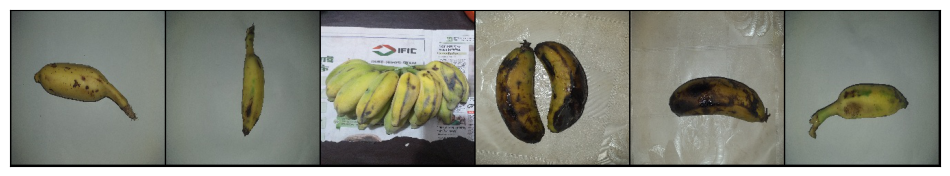

In [100]:
show_batch(train_dl)

Step 2 is done.

**Step 3: Model Selection**

Transfer learning is a machine learning technique in which a pre-trained model is used as a starting point for a new task. In transfer learning, the knowledge gained from solving one problem is applied to a different but related problem, allowing the model to learn faster and perform better with less training data.

So need to select a pretrained model that has been trained on a similiar dataset. My choice is a DenseNet-121 trained on ImageNet dataset which has 1000 categorie including banana. 

denseNet-121 has 1 linear layer for classification. So for experiment 1 we will use it to try to classify.

Here loss function is cross_entropy

In [101]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [102]:
class DenseNet121(ImageClassificationBase):
    def __init__(self, num_classes):
        super().__init__()
        self.model = models.densenet121(pretrained=True)
        # Replace the classification layer with a new layer
        num_inputs = self.model.classifier.in_features  # 1024
        self.model.classifier = torch.nn.Linear(num_inputs, num_classes)
        # Freeze all layers
        for param in self.model.parameters():
            param.requires_grad = False

        # Unfreeze the classification layer
        for param in self.model.classifier.parameters():
            param.requires_grad = True


    def forward(self, cx):
        return self.model(cx)

In [103]:
# Create a instance of denseNet use 3 classes
model_fc1 = DenseNet121(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 76.1MB/s]


In [104]:
model_fc1

DenseNet121(
  (model): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0

**Step 4: Model Training**

Create helper functions to train and validate model.

Use One Cycle learning rate policy, weight decay, gradient clipping etc. Use SGD as default optimizer.

In [105]:
@torch.no_grad()
# Evaluate model for each epoach
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    # Send the result using validation_epoach end function
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [106]:
# Check our model
history = [evaluate(model_fc1, val_dl)]
history

[{'val_loss': 1.2823128700256348, 'val_acc': 0.25}]

**Hyper Parameters**

Chose best hyper parameter. Fine-tune Hyper parameters.

In [107]:
epochs = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [108]:
%%time
history += fit_one_cycle(epochs, max_lr, model_fc1, train_dl, val_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00380, train_loss: 1.0733, val_loss: 1.0534, val_acc: 0.5556
Epoch [1], last_lr: 0.00933, train_loss: 0.5249, val_loss: 0.1636, val_acc: 0.9444
Epoch [2], last_lr: 0.00972, train_loss: 0.4437, val_loss: 0.2763, val_acc: 0.9167
Epoch [3], last_lr: 0.00812, train_loss: 0.2970, val_loss: 0.3213, val_acc: 0.8889
Epoch [4], last_lr: 0.00556, train_loss: 0.4766, val_loss: 0.0386, val_acc: 1.0000
Epoch [5], last_lr: 0.00283, train_loss: 0.1941, val_loss: 0.0822, val_acc: 0.9722
Epoch [6], last_lr: 0.00077, train_loss: 0.1241, val_loss: 0.1074, val_acc: 0.9444
Epoch [7], last_lr: 0.00000, train_loss: 0.1077, val_loss: 0.1025, val_acc: 0.9722
CPU times: user 4min 50s, sys: 12.5 s, total: 5min 3s
Wall time: 5min 6s


Plot validation accuracy

In [109]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

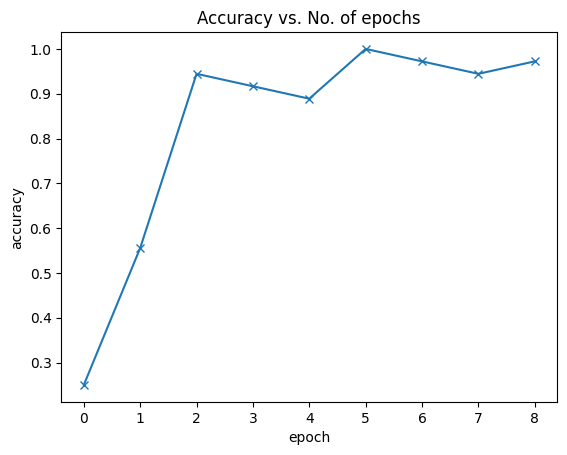

In [110]:
plot_accuracies(history)

Plot losses to see current trend

In [111]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

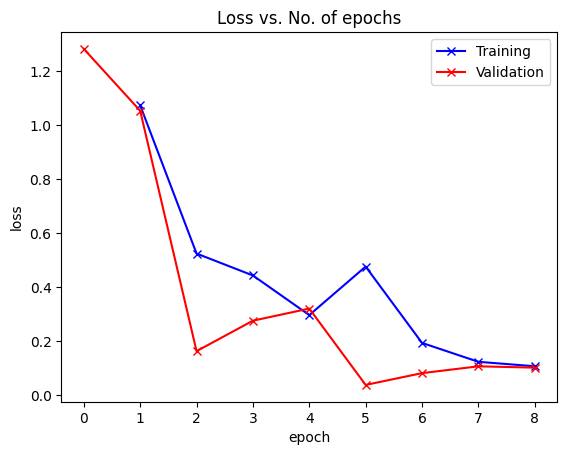

In [112]:
plot_losses(history)

**Plot learning rate**

Learning rate change over time

In [113]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

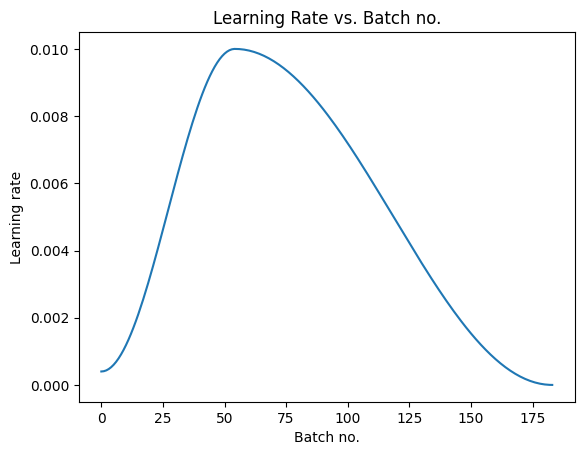

In [114]:
plot_lrs(history)

**Step 5: Testing**

Use individaual image to test

In [127]:
# Define a function that uses given model to predict a individual image
def predict_image(img, model):
    # Convert to a batch of 1
    xb = img.unsqueeze(0)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_classes[preds[0].item()]

In [132]:
# Load test dataset
#test_dl = DataLoader(test_ds, batch_size)
# Resize the images to 224 x 224 for DenseNet
# Used cv2 for permenant resize
# Define the directory containing the image
dir_path = test_dir + '/overripe'
#dir_path = test_dir + '/ripe'
#dir_path = test_dir + '/unripe'

# Define the target size for the resized images
target_size = (224, 224)

# Loop through each file in the directory
for filename in os.listdir(dir_path):
    # Load the image using cv2
    img = cv2.imread(os.path.join(dir_path, filename))
    # Resize the image
    resized_img = cv2.resize(img, target_size)
    # Save the resized image with the same filename
    cv2.imwrite(os.path.join(dir_path, filename), resized_img)

In [139]:
# PyTorch datasets
# Data transforms 
data_transform = T.Compose([
    T.ToTensor()
])

test_ds = datasets.ImageFolder(data_dir+'/test', data_transform)

In [148]:
test_ds.classes

['overripe', 'ripe', 'unripe']

Label: overripe , Predicted: overripe


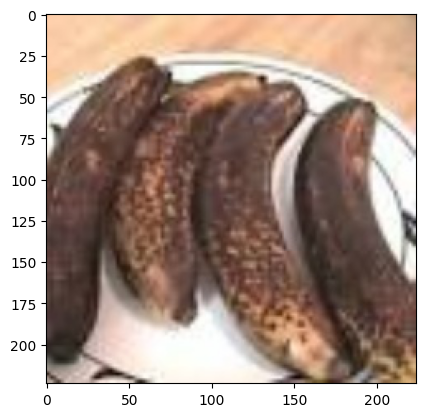

In [149]:
img, label = test_ds[4]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model_fc1))

Label: overripe , Predicted: overripe


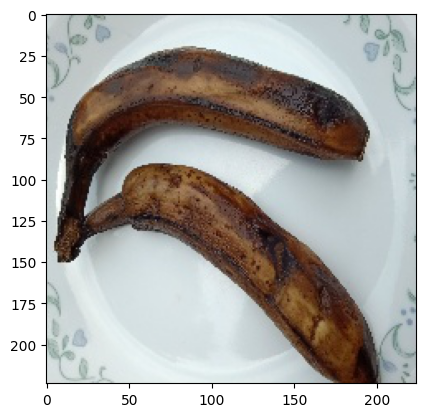

In [150]:
img, label = test_ds[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model_fc1))

Label: ripe , Predicted: unripe


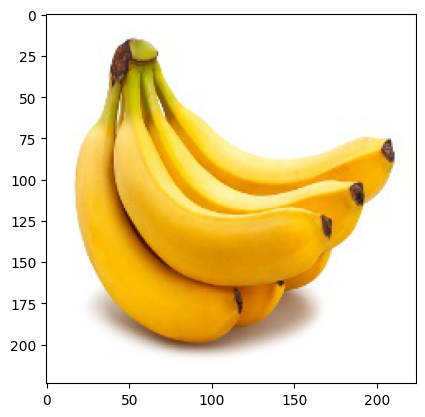

In [151]:
img, label = test_ds[22]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model_fc1))